<b><h1>Project Overview</h1>
<h3>Description</h3></b>
Choose a topic that interests you and find some data.  Us your knowledge of pandas, matplotlib and scikit-learn, create a machine learning application on a dataset that interests you. Taking advantage of Colab, you will embed narratives intermixed with code.  Each requirement below is its own text and code block in Colab.  It is probably best to use multiple text and code blocks for each requirement.
<br>
<b><h3>Requirements</h3></b>
<ol>
  <li><i>Background information and data retrieval</i><br>
    <u>Text Block</u> Provide a brief description of the dataset.  
    <ul>
      <li>General information about the dataset</li>
      <li>What is your machine learning application predicting?</li>
      <li>How is this prediction useful to someone?</li>
    </ul>
    <u>Code Block</u>   
    <ul>
      <li>Load the libraries</li>
      <li>Load the dataset</li>
      <li>Provide a preview of the data</li>
    </ul>
  </li>
  <li><i>Data Preparation</i><br>
    <u>Text Block</u> Provide a brief description of the preparation that needed to be made to the data prior to creating the machine learning model.  
    <ul>
      <li>What cleaning did you have to perform?</li>
      <li>Do you have to filter the data to exclude outliers for instance?</li>
      <li>What analysis did you perform to determine the right features to use?</li>
    </ul>
    <u>Code Block</u> Following are possbile options 
    <ul>
      <li>Drop NaN. Transform and handle "dirty" data.</li>
      <li>View histograms, scatter plots, correlation matrices and heatmaps to analyze the data</li>
      <li>Filter the data</li>
      <li>Select the target and features. Split the data into a training and testing sets.</li>
    </ul>
  </li>
  <li><i>Model Building</i><br>
  <u>Text Block</u> Discuss the outcome of building the model.    
    <ul>
      <li>What is your machine learning application predicting?</li>
      <li>How well did does your model predict?</li>
      <li>Were there any modifications you made after creating the model?</li>
    </ul>
    <u>Code Block</u> 
    <ul>
      <li>Create and train the model.</li>
      <li>Evaluate the model.</li>
    </ul>
  </li>
  <li><i>Machine Learning Application</i><br>
    <u>Text Block</u> Discuss the outcome of machine learning application.    
    <ul>
      <li>What is your machine learning application predicting?</li>
      <li>How is this prediction useful to someone?</li>
      <li>Conclusion</li>
    </ul>
    <u>Code Block</u> Provide a couple of predictions to demonstrate that your machine learning application
  </li>


# **Background information and data retrieval**





1. The housing datasets provide data on houses' value, space, air-condition, parking lot, etc.

2. My machine learning application is predicting the price of a house based on housing features like number of bathrooms, number of stories, airconditioning status, furnishing status, number of parking, etc.

3. We can use this model to help determine if the house's price is worth purchasing or not so that users won't feel scammed when shopping for a house.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
df = pd.read_csv("https://MLResources.rennecastro.repl.co/Housing.csv")
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


# **Data Preparation**

1. There was really no cleaning needed since there wasn't any dirty data; however, I decided to convert my categorical datasets that can be quantitative for my machine learning model in order to get more accurate predictions.

2. I decided to filter out my data using the outlier formula and created a function using the formula. I can only apply this for "area" and "price" because these are the only two features that appear to show skewness and aren't too small in magnitude when it comes to numbers. 

3. The strongest correlation for the "price" was the "area". Even then, its correlation strength is still not strong enough so I decided to try using all the features available because theoretically, the more data you feed to the model, the more accurate the model will become since the "area" isn't the sole facotr that determines the "price" of a house. For example, a feature like air conditioning is an important feature because the house is not worth living in during extreme-high temperatures that might cook you alive even if the living space is humongous.

In [ ]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [ ]:
#Make the categorical datasets quantitative so that the machine learning model can use it
def transform(dataFrame, listStr): # Only run it once
  for i in range(len(listStr)):
    dataFrame[listStr[i]] = dataFrame[listStr[i]].apply(lambda x: 1 if x == 'yes' else 0)
  return dataFrame

columns = ['basement', 'airconditioning', 'hotwaterheating', 'mainroad', 'prefarea', 'guestroom']
data = transform(df, columns)
df = pd.read_csv("https://MLResources.rennecastro.repl.co/Housing.csv") #keeps df the same

for i in range(df['furnishingstatus'].count()):
  if data.iat[i,12] == 'furnished':
    data.iat[i,12] = 2
  elif data.iat[i,12] == 'semi-furnished':
    data.iat[i,12] = 1
  elif data.iat[i,12] == 'unfurnished':
    data.iat[i,12] = 0
data = data.astype(int)#makes 'furnishingstatus' a int column

In [ ]:
#Remvoing outliers
def outlierRemover(dataFrame, listStr):
  for i in range(len(listStr)):
    q1 = dataFrame[listStr[i]].quantile(.25)
    q3 = dataFrame[listStr[i]].quantile(.75)
    outRange = (q3 - q1) * 1.5
    dataFrame = dataFrame[(dataFrame[listStr[i]] > q1 - outRange) & (dataFrame[listStr[i]] < q3 + outRange)]
  return dataFrame

In [ ]:
data.shape #Shape of the dataframe

(545, 13)

In [ ]:
data = outlierRemover(data, ['price','area'])
data.shape #shape after the dataFrame's outliers are removed

(517, 13)

In [ ]:
data.head(10) #new quantitative look

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,2
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,2
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,1
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,0
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,2
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,2
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,2


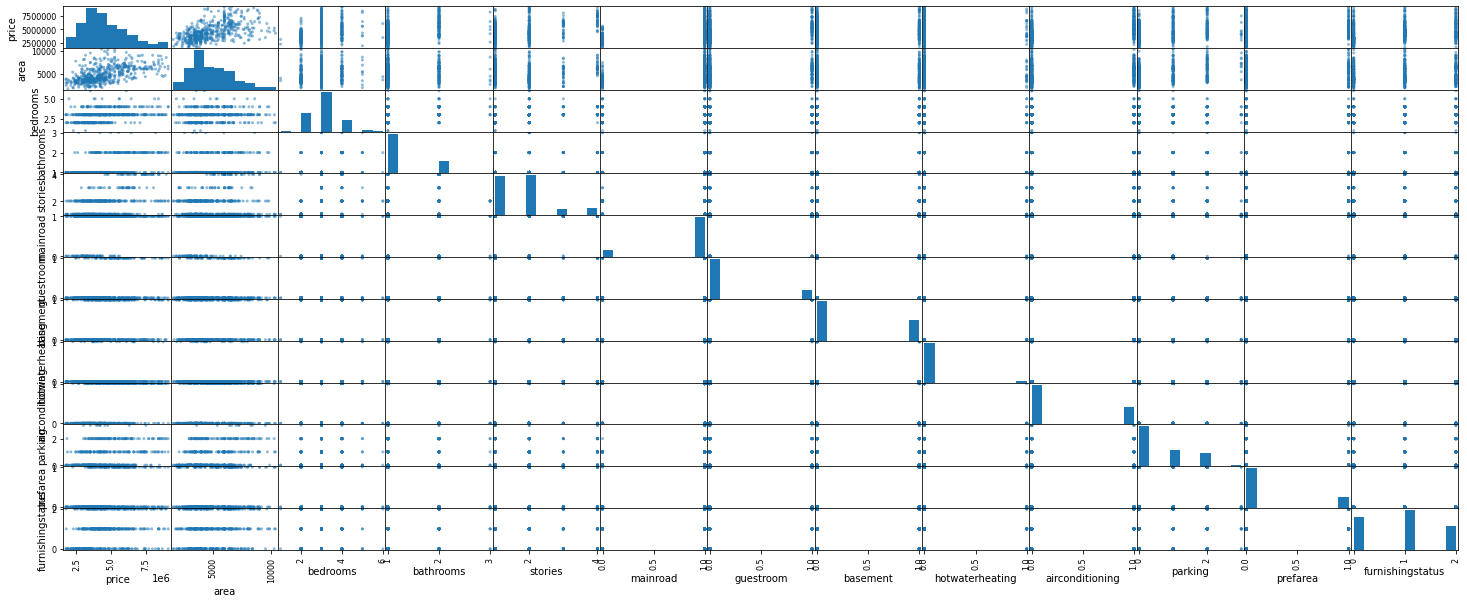

In [ ]:
pd.plotting.scatter_matrix(data,figsize=(25,10)) #Quantitative View on graphs
plt.show()

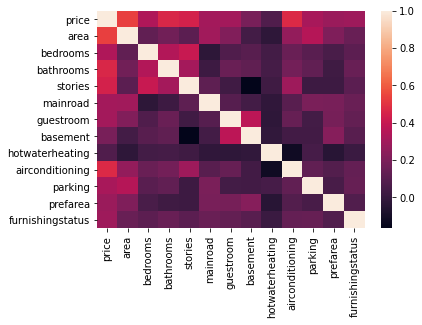

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.533186,0.335328,0.466483,0.446839,0.307185,0.303994,0.190117,0.075979,0.471706,0.321058,0.280808,0.291663
area,0.533186,1.000000,0.127745,0.171528,0.109877,0.302116,0.213826,0.042227,-0.020489,0.264680,0.357276,0.208014,0.144342
bedrooms,0.335328,0.127745,1.000000,0.346230,0.406684,-0.025775,0.078443,0.102261,0.042953,0.150378,0.105561,0.061014,0.115850
bathrooms,0.466483,0.171528,0.346230,1.000000,0.311314,0.024614,0.152035,0.124691,0.046486,0.175634,0.127102,0.027817,0.145514
stories,0.446839,0.109877,0.406684,0.311314,1.000000,0.120759,0.034301,-0.166031,0.027834,0.293854,0.022043,0.021529,0.109608
mainroad,0.307185,0.302116,-0.025775,0.024614,0.120759,1.000000,0.095201,0.041789,-0.019471,0.102198,0.195635,0.193613,0.149323
guestroom,0.303994,0.213826,0.078443,0.152035,0.034301,0.095201,1.000000,0.373599,-0.022922,0.139242,0.041133,0.184999,0.130269
basement,0.190117,0.042227,0.102261,0.124691,-0.166031,0.041789,0.373599,1.000000,-0.012428,0.034796,0.038480,0.229180,0.099779
hotwaterheating,0.075979,-0.020489,0.042953,0.046486,0.027834,-0.019471,-0.022922,-0.012428,1.000000,-0.119731,0.052510,-0.041079,0.013169
airconditioning,0.471706,0.264680,0.150378,0.175634,0.293854,0.102198,0.139242,0.034796,-0.119731,1.000000,0.129590,0.087044,0.136810


# **Model Build**

1. My machine learning application is predicting the price of a house based on the other housing features like area, bathrooms, stories, furnishing status, etc.

2. My model scored a about 64.7% when comes to accuracy of the model against the training data. So its not that accurate but not extremely inaccurate.

3. Some of modifications I made after creating the model came after feeding all the features to my model. Its when I droped some of the features through testing to see if could increase my score which it did. Is here where I realize that correlation strength doesn't always equate to more accurate data since there were features that hindered the model accuracy like bedrooms who's correlation were higher than the one's that helped the accuracy of the model like basement.


In [ ]:
listFeature = ['area','bathrooms','airconditioning','stories','parking','prefarea','basement','furnishingstatus','mainroad']
feature, target = [data[listFeature],data[["price"]]]
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state = 9)

lr = LinearRegression()
lr.fit(feature_train,target_train)
print('Score: ' + str(lr.score(feature_test,target_test)))

Score: 0.6471797500458416


# **Machine Learn Application**

1. My machine learning application is predicting the price of a house based on housing features (bathrooms, stories, airconditioning, furnishing status, parking, basement, and main road)

2. We can use this model to help determine if the house's price is worth purchasing or not so that users won't feel scammed when shopping for a house.

3. The model is still not accurate as you can see instances of deviations as high as over 1 million in housing price from the predicted value to the actual value. We can assume that either the house price is not easily determinable or we simply don't have enough data to feed to our machine learning model.

In [ ]:
for times in range(3):
  sample_data = data.sample()
  predictVaule = lr.predict(sample_data[listFeature])
  testVaule = sample_data['price']
  print(sample_data)
  print(f"Predicted Price: {int(predictVaule)}")
  print(f"Residual: {int(predictVaule) - int(testVaule)}\n\n")

       price  area  bedrooms  ...  parking  prefarea  furnishingstatus
193  5033000  4800         2  ...        0         0                 1

[1 rows x 13 columns]
Predicted Price: 3904058
Residual: -1128942


       price  area  bedrooms  ...  parking  prefarea  furnishingstatus
386  3535000  3850         3  ...        2         0                 0

[1 rows x 13 columns]
Predicted Price: 3314911
Residual: -220089


       price  area  bedrooms  ...  parking  prefarea  furnishingstatus
505  2653000  4000         3  ...        0         0                 0

[1 rows x 13 columns]
Predicted Price: 4205546
Residual: 1552546


